In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

#import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
#plt.rcParams['figure.figsize']=7,4
from sklearn.decomposition import PCA

In [17]:
df=pd.read_csv("e:/presentation1.csv")
x = df.iloc[:,0:24]
y=df.iloc[:,-1]
target=y

In [18]:
kmeans=KMeans(n_clusters=2,random_state=5,verbose=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [19]:
color_theme=np.array(['red','green'])
color_theme
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [20]:
kmeans.cluster_centers_

array([[ 2.33333333e+00,  5.55111512e-17,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.66666667e-01,
         1.33333333e+00,  1.00000000e+00,  0.00000000e+00,
         5.00000000e-01,  1.00000000e+00,  6.66666667e-01,
         1.16666667e+00,  6.66666667e-01,  1.00000000e+00,
         0.00000000e+00,  2.33333333e+00,  1.66666667e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.66666667e-01],
       [ 4.63157895e+00,  5.26315789e-01,  1.84210526e+00,
         1.57894737e-01,  9.47368421e-01,  3.68421053e-01,
         1.10526316e+00,  5.78947368e-01,  0.00000000e+00,
         8.94736842e-01,  7.89473684e-01,  8.42105263e-01,
         1.31578947e+00,  8.42105263e-01,  9.47368421e-01,
         0.00000000e+00,  1.26315789e+00, -6.93889390e-18,
         0.00000000e+00,  5.26315789e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.31578947e-01]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70)

In [22]:
y_pred=kmeans.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7777777777777778

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.71      1.00      0.83        10

   micro avg       0.78      0.78      0.78        18
   macro avg       0.86      0.75      0.75        18
weighted avg       0.84      0.78      0.76        18



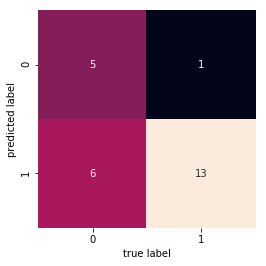

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y,kmeans.labels_)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)

In [ ]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
         marker='o')
    elif y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')

pl.legend([c1, c2], ['Not Accepatable', 'Acceptable'])
pl.title('Presentation dataset with 2 clusters ')
pl.show()